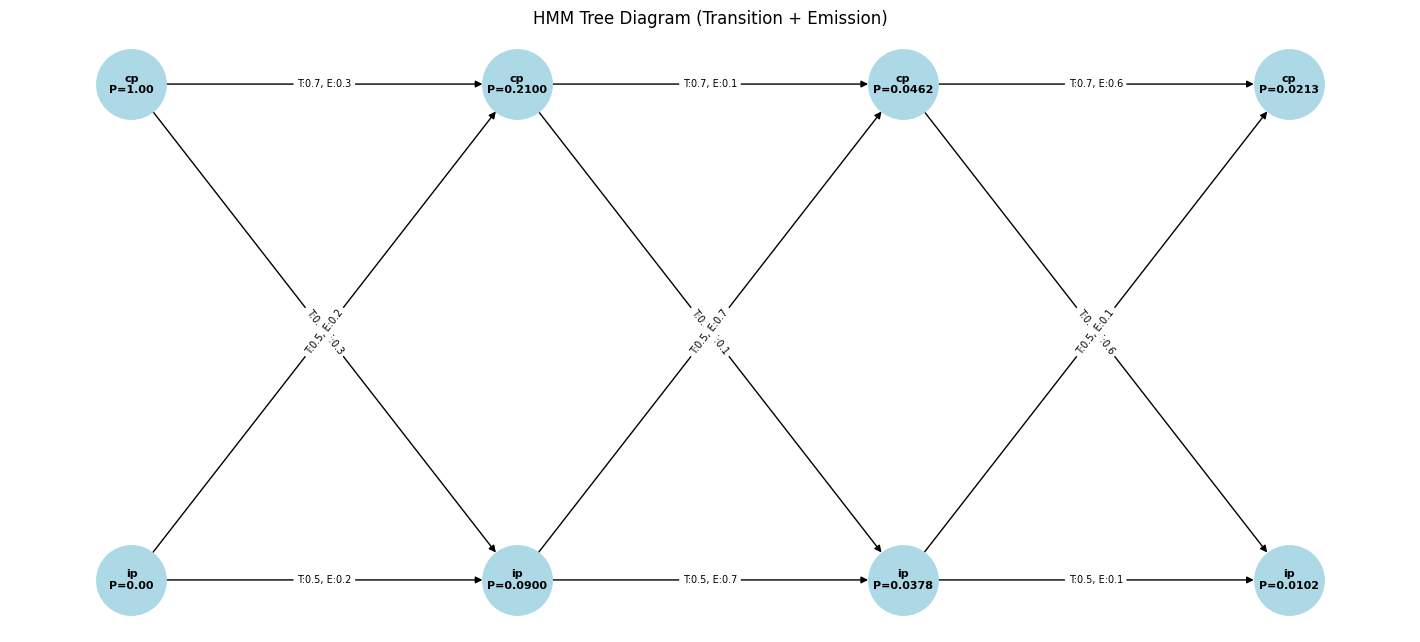

In [12]:
import matplotlib.pyplot as plt
import networkx as nx

# Define HMM parameters
initial = {'cp': 1, 'ip': 0}
states = ['cp', 'ip']
observations = ['lem', 'ice-t', 'cola']
transition = {'cp': {'cp': 0.7, 'ip': 0.3}, 'ip': {'cp': 0.5, 'ip': 0.5}}
emission = {
    'cp': {'lem': 0.3, 'ice-t': 0.1, 'cola': 0.6},
    'ip': {'lem': 0.2, 'ice-t': 0.7, 'cola': 0.1}
}

# Create directed graph
G = nx.DiGraph()

# Step 0: Initial states
for state in states:
    G.add_node(f"0_{state}", label=f"{state}\nP={initial[state]:.2f}")

# Iterate through observations and build graph
prev_probs = initial.copy()
for t, obs in enumerate(observations, 1):
    curr_probs = {'cp': 0, 'ip': 0}
    for from_state in states:
        for to_state in states:
            prob = prev_probs[from_state] * transition[from_state][to_state] * emission[from_state][obs]
            curr_probs[to_state] += prob
            # Add edge with labels
            from_node = f"{t-1}_{from_state}"
            to_node = f"{t}_{to_state}"
            G.add_node(to_node, label=f"{to_state}\nP={curr_probs[to_state]:.4f}")
            G.add_edge(from_node, to_node, label=f"T:{transition[from_state][to_state]}, E:{emission[from_state][obs]}")

    prev_probs = curr_probs

# Position nodes layer by layer
pos = {}
layers = len(observations) + 1
for i in range(layers):
    for j, state in enumerate(states):
        pos[f"{i}_{state}"] = (i, -j)

# Draw the graph
labels = nx.get_node_attributes(G, 'label')
edge_labels = nx.get_edge_attributes(G, 'label')

plt.figure(figsize=(14, 6))
nx.draw(G, pos, with_labels=True, labels=labels, node_size=2500, node_color="lightblue", font_size=8, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=7)
plt.title("HMM Tree Diagram (Transition + Emission)", fontsize=12)
plt.axis('off')
plt.show()


{('cp', 'cp'): Text(-0.25000000000000033, -0.2250000000000001, '0.7'),
 ('cp', 'ip'): Text(-0.2500000000000001, -7.664115400873861e-06, '0.3'),
 ('cp', 'lem'): Text(0.12499829867010659, 0.18749744800516055, '0.3'),
 ('cp', 'ice-t'): Text(0.12499741147621535, -0.5624987057381077, '0.1'),
 ('cp', 'cola'): Text(0.12499741147621535, -0.18750129426189233, '0.6'),
 ('ip', 'cp'): Text(-0.2500000000000001, 7.664115400873861e-06, '0.5'),
 ('ip', 'ip'): Text(-0.25000000000000033, 0.5250000000000001, '0.5'),
 ('ip', 'lem'): Text(0.12499741147621535, 0.5624987057381077, '0.2'),
 ('ip', 'ice-t'): Text(0.12499829867010659, -0.18749744800516055, '0.7'),
 ('ip', 'cola'): Text(0.12499741147621535, 0.18750129426189233, '0.1'),
 ('start', 'cp'): Text(-0.6250025885237848, -0.18749870573810778, '1')}

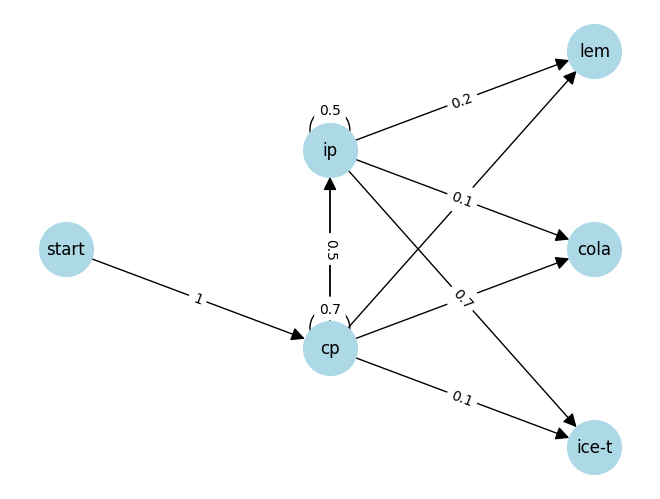

In [10]:
import networkx as nx
import matplotlib.pyplot as plt

initial = {'cp': 1, 'ip': 0}
states = ['cp', 'ip']
states1 = ['lem', 'ice-t', 'cola']
transition = {'cp': {'cp': 0.7, 'ip': 0.3}, 'ip': {'cp': 0.5, 'ip': 0.5}}
emission = {'cp': {'lem': 0.3, 'ice-t': 0.1, 'cola': 0.6}, 'ip': {'lem': 0.2, 'ice-t': 0.7, 'cola': 0.1}}

G = nx.DiGraph()
G.add_nodes_from(states, subset=0)
G.add_nodes_from(states1, subset=1)
G.add_node('start', subset=-1)

for i in states:
    for j in states:
        if transition[i][j] > 0:
            G.add_edge(i, j, label=f"{transition[i][j]}")
    for k in states1:
        if emission[i][k] > 0:
            G.add_edge(i, k, label=f"{emission[i][k]}")
for s in states:
    if initial[s] > 0:
        G.add_edge('start', s, label=f"{initial[s]}")

pos = nx.multipartite_layout(G, subset_key='subset')
nx.draw(G, pos, with_labels=True, node_size=1500, node_color='lightblue', arrowsize=20)
nx.draw_networkx_edge_labels(G, pos, nx.get_edge_attributes(G, 'label'))


In [5]:
initial = {'cp': 1, 'ip': 0}
states = ['cp', 'ip']
states1 = ['lem', 'ice-t', 'cola']
transition = {'cp': {'cp': 0.7, 'ip': 0.3}, 'ip': {'cp': 0.5, 'ip': 0.5}}
emission = {'cp': {'lem': 0.3, 'ice-t': 0.1, 'cola': 0.6}, 'ip': {'lem': 0.2, 'ice-t': 0.7, 'cola': 0.1}}

for i in states1:
    sum1=0
    sum2=0
    for j in states:
        for k in states:
            n=transition[j][k]*emission[j][i]*initial[j]
            print(n)
            if k=='cp':
                sum1+=n
            if k=='ip':
                sum2+=n

    initial['cp']=sum1
    initial['ip']=sum2
    print(initial)

print(initial['cp']+initial['ip'])
        

0.21
0.09
0.0
0.0
{'cp': 0.21, 'ip': 0.09}
0.014699999999999998
0.006299999999999999
0.0315
0.0315
{'cp': 0.0462, 'ip': 0.0378}
0.019403999999999998
0.008315999999999999
0.0018900000000000002
0.0018900000000000002
{'cp': 0.021293999999999997, 'ip': 0.010206}
0.0315


In [17]:
initial = {'cp': 1, 'ip': 0}
states = ['cp', 'ip']
states1 = ['lem', 'ice-t', 'cola']
transition = {'cp': {'cp': 0.7, 'ip': 0.3}, 'ip': {'cp': 0.5, 'ip': 0.5}}
emission = {'cp': {'lem': 0.3, 'ice-t': 0.1, 'cola': 0.6}, 'ip': {'lem': 0.2, 'ice-t': 0.7, 'cola': 0.1}}

for i in states1:
    sum1=0
    sum2=0
    for j in states:
        for k in states:
            n=transition[j][k]*emission[j][i]*initial[k]
            print(n)
            if j=='cp':
                sum1+=n
            if j=='ip':
                sum2+=n

    initial['cp']=sum1
    initial['ip']=sum2
    print(initial)

print(initial['cp']*0+initial['ip']*1)
        

0.21
0.0
0.1
0.0
{'cp': 0.21, 'ip': 0.1}
0.014699999999999998
0.003
0.0735
0.034999999999999996
{'cp': 0.017699999999999997, 'ip': 0.10849999999999999}
0.007433999999999999
0.019529999999999995
0.0008849999999999999
0.005424999999999999
{'cp': 0.026963999999999995, 'ip': 0.00631}
0.00631
